In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Draw first 16 PCA components for MNIST data (for all labels)

In [2]:
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
X_train = X_train.reshape(-1, 28, 28)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(
    X_train.reshape(-1, 784)
).reshape(-1, 28, 28)

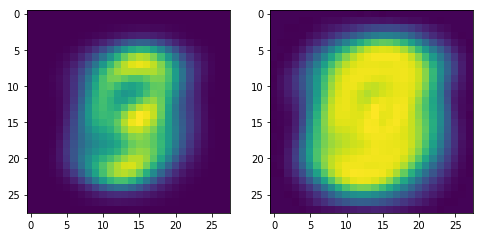

In [4]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
ax1.imshow(scaler.mean_.reshape(28, 28), interpolation='nearest')
ax2.imshow(scaler.scale_.reshape(28, 28), interpolation='nearest')

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16, svd_solver='randomized', whiten=False)
pca.fit(X_train.reshape(-1, 784))

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

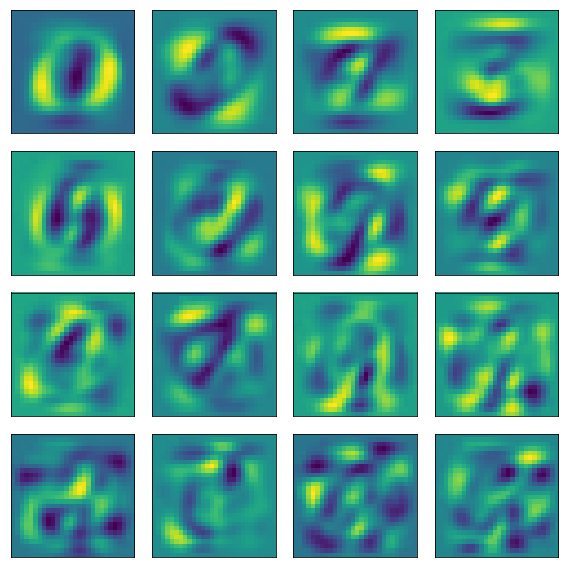

In [12]:
f, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
for row in xrange(4):
    for col in xrange(4):
        axs[row, col].imshow(pca.components_[row * 4 + col].reshape(28, 28), interpolation='nearest')
        axs[row, col].set_xticks(())
        axs[row, col].set_yticks(())
plt.tight_layout()
plt.savefig('mnist_all_pca_16_components.eps')

### Draw first 16 PCA components for MNIST data (for zeroes labels only)

In [44]:
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
X_train = X_train.reshape(-1, 28, 28)

In [45]:
X_train = X_train[y_train == 0]

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(
    X_train.reshape(-1, 784)
).reshape(-1, 28, 28)

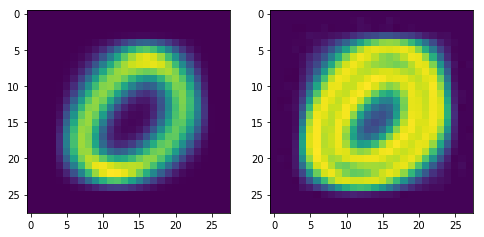

In [47]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
ax1.imshow(scaler.mean_.reshape(28, 28), interpolation='nearest')
ax2.imshow(scaler.scale_.reshape(28, 28), interpolation='nearest')

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16, svd_solver='randomized', whiten=False)
pca.fit(X_train.reshape(-1, 784))

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

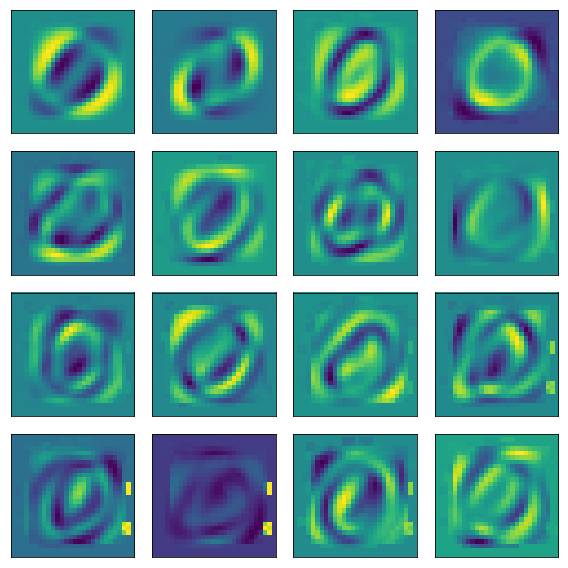

In [51]:
f, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
for row in xrange(4):
    for col in xrange(4):
        axs[row, col].imshow(pca.components_[row * 4 + col].reshape(28, 28), interpolation='nearest')
        axs[row, col].set_xticks(())
        axs[row, col].set_yticks(())
plt.tight_layout()
plt.savefig('mnist_zeroes_pca_16_components.eps')

### Draw eigenvalues of MNIST data

In [20]:
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
X_train = X_train.reshape(-1, 28, 28)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(
    X_train.reshape(-1, 784)
).reshape(-1, 28, 28)

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=784, svd_solver='randomized', whiten=False)
pca.fit(X_train.reshape(-1, 784))

PCA(copy=True, iterated_power='auto', n_components=784, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

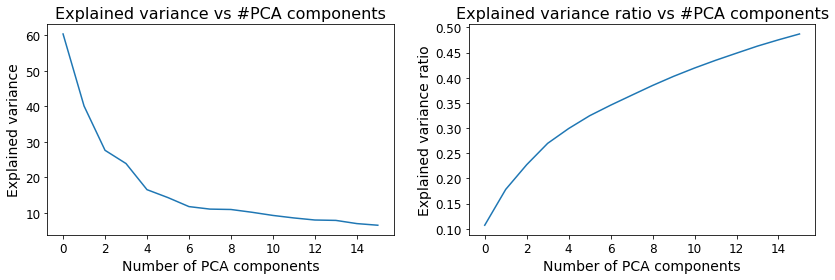

In [52]:
f, (ax_left, ax_right) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax_left.plot(pca.explained_variance_)
ax_left.set_title('Explained variance vs #PCA components', fontsize=16)
ax_left.set_xlabel('Number of PCA components', fontsize=14)
ax_left.set_ylabel('Explained variance', fontsize=14)
for tick in ax_left.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax_left.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
ax_right.plot(np.cumsum(pca.explained_variance_ratio_))
ax_right.set_title('Explained variance ratio vs #PCA components', fontsize=16)
ax_right.set_xlabel('Number of PCA components', fontsize=14)
ax_right.set_ylabel('Explained variance ratio', fontsize=14)
for tick in ax_right.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax_right.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
plt.tight_layout()

plt.savefig('mnist_pca_explained_variance.eps')